<a href="https://colab.research.google.com/github/facundoag/Banck-churner/blob/main/BankChurner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstracto:

En este trabajo, se utilizará el conjunto de datos BankChurners para predecir la rotación de clientes bancarios.
La rotación de clientes, también conocida como "churn", se refiere a la tasa de clientes que dejan de hacer negocios con una empresa en un período de tiempo determinado.
La rotación de clientes es un problema común en la industria bancaria, y puede ser costoso para las empresas debido a la pérdida de ingresos y la necesidad de atraer nuevos clientes.


El resultado de este trabajo puede ser útil para las empresas de la industria bancaria al proporcionar información sobre los factores que influyen en la rotación de clientes y ayudar a predecir cuándo es probable que un cliente deje de hacer negocios con una empresa. Esto puede permitir a las empresas tomar medidas preventivas para retener a los clientes y mejorar su satisfacción.

El conjunto de datos contiene información de clientes bancarios, como su edad, educación, ingresos, historial de crédito y comportamiento de pago, entre otros atributos.

Esta compuesto por 21 atributos y 10127 datos.


# Importacion de las Librerias

Este notebook usa varios paquetes de python que son bastante comunes en el análisis de datos. Las librerías principales que usaremos son:

NumPy: Brinda una estructura númerica y funciones para trabajar con esos datos de forma rápida.

Pandas: Brinda una estructura de cuadro de daatos para almacenar los datos en memory y trabajarlos de forma fácil y eficiente.

Scikit-learn: La libería más habitual para hacer machine learning en Python.

Matplotlib: Librería base de visualizaciones.

Seaborn: Librería estadística avanzada para hacer gráficos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Data Exploration

Importacion del Data Set

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis Bancos/BankChurners.csv')
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Informacion de los datos

# Dimension del dataset

In [ ]:
data.shape

(10127, 21)

* El dataset se compone de 10127 filas por 21 columnas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_



*  Todos los datos estan los formatos correctos




# Analisis de existencia de datos nulos

In [ ]:
data.isna().sum().sort_values(ascending = False)

CLIENTNUM                   0
Months_Inactive_12_mon      0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Total_Relationship_Count    0
Attrition_Flag              0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Avg_Utilization_Ratio       0
dtype: int64



* No existen datos nulos




In [ ]:
data.select_dtypes('object').describe().T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


# Analisis de variables categoricas

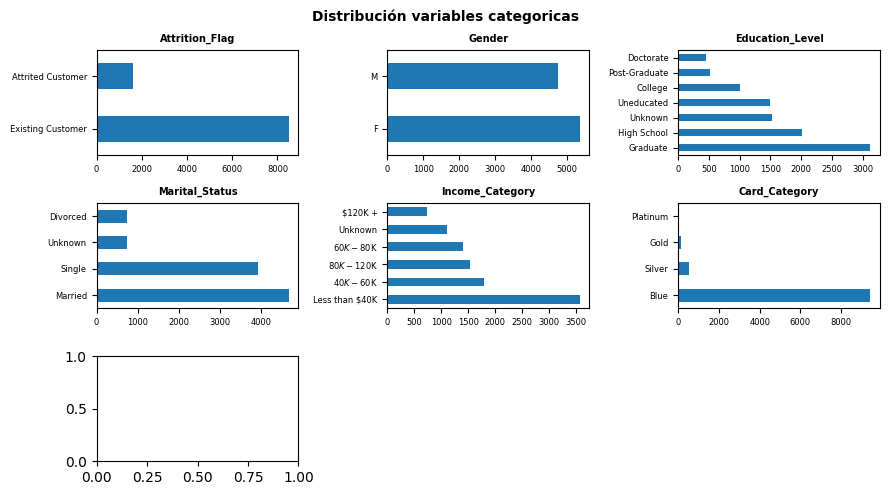

In [ ]:
# Gráfico para cada variable cualitativa

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    data[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables categoricas',
             fontsize = 10, fontweight = "bold");

Conclusion:


1.   Podemos observar que existen mas cantidad de clientes que continuan en el banco que clientes que se fueron
2.   Predomina gran cantidad de clientes femeninos que clientes masculinos.
1.   Predomina el nivel educativo graduado aunque existen muchos clientes que no especifican educacion, puede ser un punto a tener en cuenta si queremos utilizar este dato.
2.   Predomina los casados sobre los solteros, puede tener alguna conexion con la cantidad de clientes femeninos.
1.   Predomina los clientes con ingresos menores a 40K, puede correlacionarse con el nivel educativo y con los que no declararon sus ingresos ni el nivel educativo .
2.   El nivel de categoria predomina el paquete Blue que corresponde a los bajos ingresos.








# Analisis de las variables numericas

Se elimina la columna Ciententenum, nola utilizaremos para elanalisis:

In [ ]:
data= data.drop('CLIENTNUM', axis=1)

Se realiza el calculoestadistico para las variables numericas

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
estadisticos_cont(data.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,46.000,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,2.000,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,36.000,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,4.000,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,2.000,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,2.000,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,4549.000,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,1276.000,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,3474.000,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.736,0.219207,0.0,0.631,0.736,0.859,3.397


In [ ]:
data.select_dtypes(include=['float64', 'int']).describe()


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Se realiza un grafico de distribucion de las variables numericas

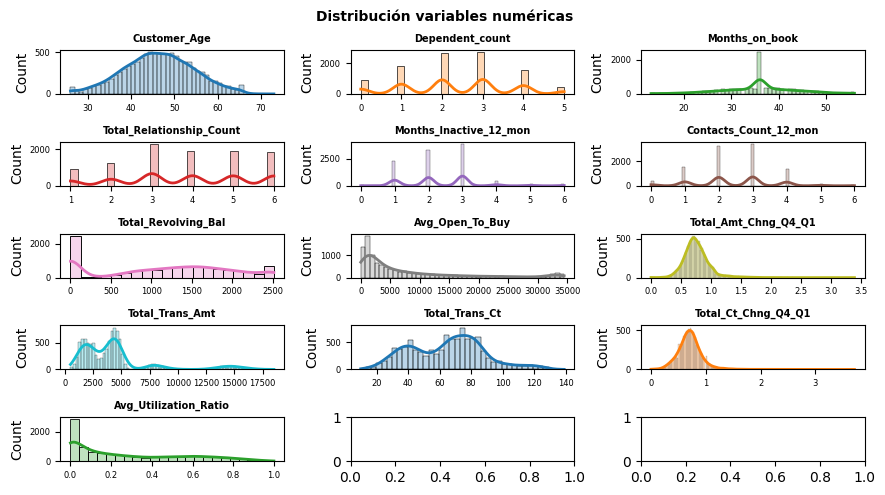

In [ ]:
# Gráfico de distribución para cada variable numérica

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Credit_Limit')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = data,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Conclusion:

1.   Se puede observar que la edad promedio de los clientes esta dentro de los 46 años, coincide con la mediana y unn desvio std de 8.
2.  Los meses en cartera un cliente esta en cartera en promedio 35,9 mesescon una mediana de 36, y un desv Std 7.9 meses
1.   El cliente se queda en promedio 3.8 años en el banco.
2.  Los clientes se quedan inactivos 2.3 meses en promedio coincidente con una mediana de 2 meses.
1.   Las transacciones realizadas en cuentas corrientes tiene un promedio de 64,85




# Presencia de datos atipicos en Variables numericas

<Axes: xlabel='Customer_Age'>

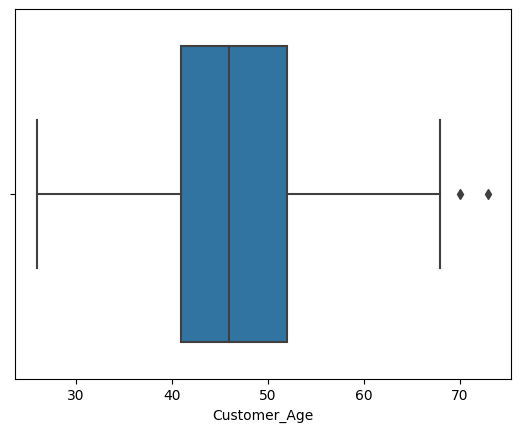

In [ ]:
sns.boxplot(data,x='Customer_Age')

<Axes: xlabel='Months_on_book'>

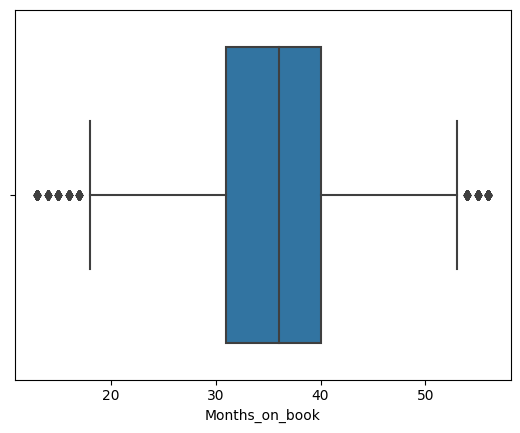

In [ ]:
sns.boxplot(data,x='Months_on_book')

<Axes: xlabel='Total_Relationship_Count'>

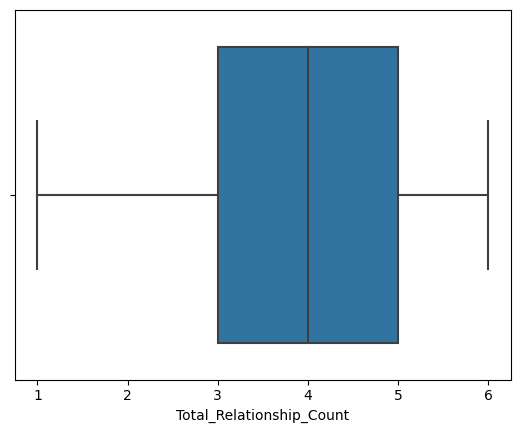

In [ ]:
sns.boxplot(data,x='Total_Relationship_Count')

<Axes: xlabel='Months_Inactive_12_mon'>

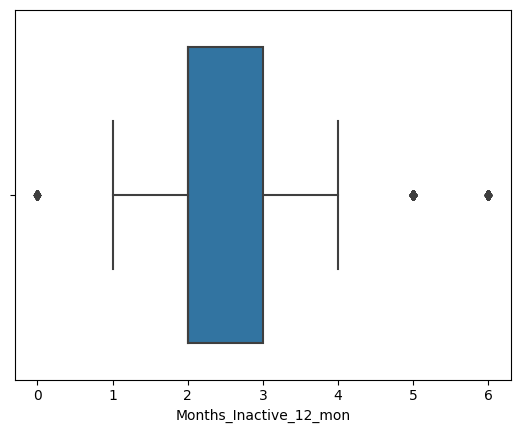

In [ ]:
sns.boxplot(data,x='Months_Inactive_12_mon')

<Axes: xlabel='Credit_Limit'>

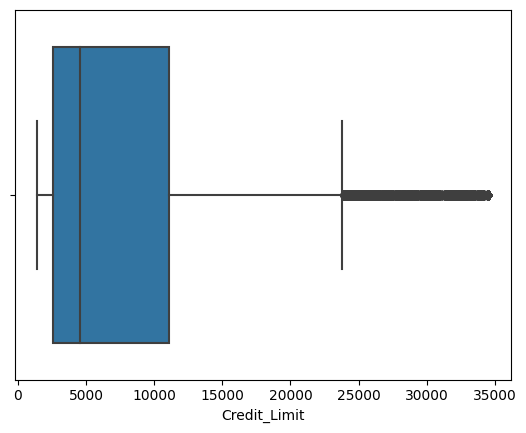

In [ ]:
sns.boxplot(data,x='Credit_Limit')

<Axes: xlabel='Avg_Open_To_Buy'>

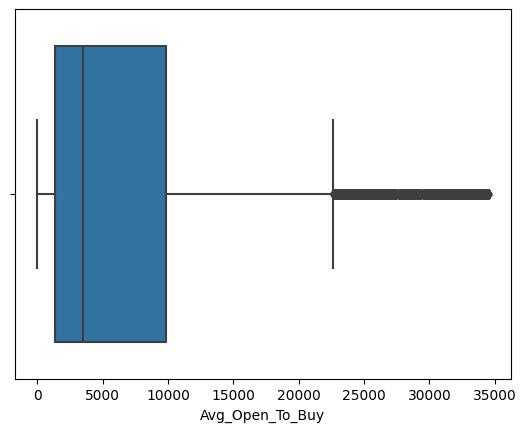

In [ ]:
sns.boxplot(data,x='Avg_Open_To_Buy')

<Axes: xlabel='Avg_Utilization_Ratio'>

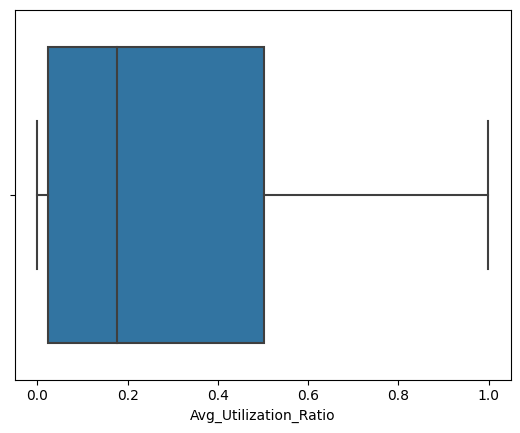

In [ ]:
sns.boxplot(data,x='Avg_Utilization_Ratio')

Correlacion entre variables numericas

<ipython-input-50-5319617b7441>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

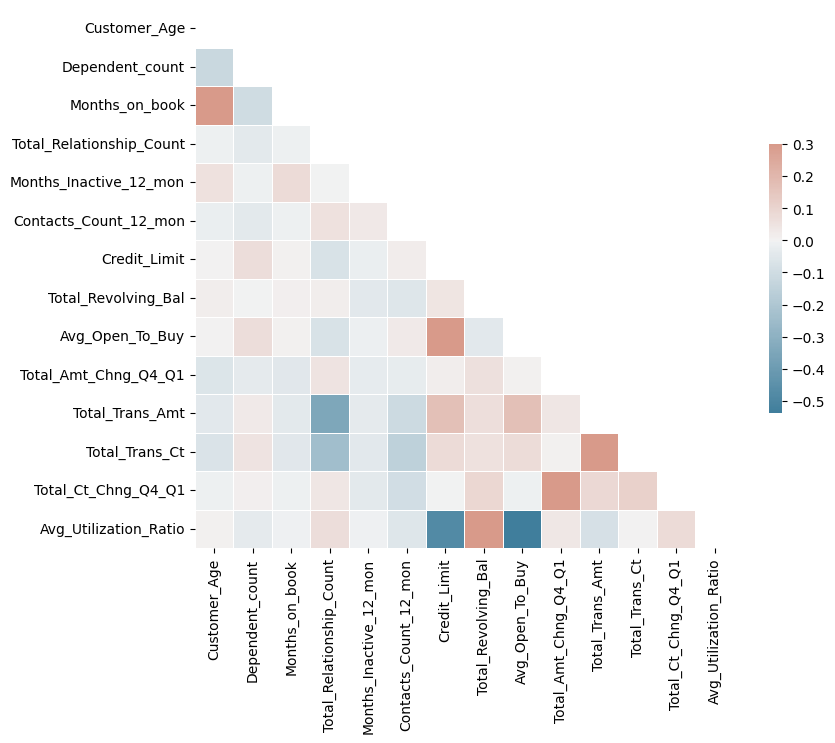

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})